In [23]:
from __future__ import print_function, division

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
import datetime

In [26]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190105, 190112, 190119, 190126, 190202, 190209, 190216, 190223, 190302, 190309, 190316, 190323, 190330, 190406, 190413, 190420, 190427, 190504, 190511, 190518, 190525, 190601, 190608, 190615, 190622, 190629, 190706, 190713, 190720, 190727, 190803, 190810, 190817, 190824, 190831, 190907, 190914, 190921, 190928, 191005, 191012, 191019, 191026, 191102, 191109, 191116, 191123, 191130, 191207, 191214, 191221, 191228]
turnstiles_df = get_data(week_nums)

In [27]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [28]:
turnstiles_df.DATE.value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
12/26/2019    29466
12/27/2019    29423
12/29/2018    28591
12/30/2018    28648
12/31/2018    28959
Name: DATE, Length: 364, dtype: int64

In [29]:
from datetime import datetime as dt

In [30]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173


In [31]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [145]:
mask = (
#(turnstiles_df["C/A"] == "R626") & 
#(turnstiles_df["UNIT"] == "R062") & 
#(turnstiles_df["SCP"] == "00-00-00") & 
#(turnstiles_df["STATION"] == "CROWN HTS-UTICA") &
    
(turnstiles_df["C/A"] == "R142") & 
(turnstiles_df["UNIT"] == "R293") & 
(turnstiles_df["SCP"] == "01-06-01") & 
(turnstiles_df["STATION"] == "34 ST-PENN STA") &
(turnstiles_df["DATE_TIME"] > "06/17/2019 00:00:00") &
(turnstiles_df["DATE_TIME"] < "06/22/2019 00:00:00"))
turnstiles_df[mask].head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
139085,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,22:00:00,REGULAR,67878882,18378613,2019-06-21 22:00:00
139084,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,18:00:00,REGULAR,67878690,18378417,2019-06-21 18:00:00
139083,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,14:00:00,REGULAR,67878441,18378033,2019-06-21 14:00:00
139082,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,10:00:00,REGULAR,67878258,18377696,2019-06-21 10:00:00
139081,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,08:44:47,REGULAR,67878208,18377464,2019-06-21 08:44:47
139080,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,08:43:26,REGULAR,67878207,18377454,2019-06-21 08:43:26
139079,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,06:00:00,REGULAR,67878145,18377248,2019-06-21 06:00:00
139078,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/21/2019,02:00:00,REGULAR,67878140,18377239,2019-06-21 02:00:00
139077,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/20/2019,22:00:00,REGULAR,67878102,18377160,2019-06-20 22:00:00
139076,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/20/2019,18:00:00,REGULAR,67877981,18376983,2019-06-20 18:00:00


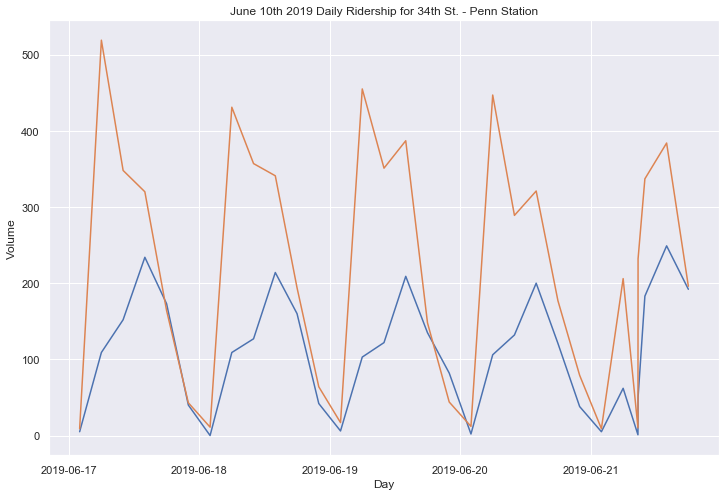

In [146]:
plt.figure(num=None, figsize=(12, 8))
plt.plot(turnstiles_df[mask].DATE_TIME, abs(turnstiles_df[mask].ENTRIES.diff()))
plt.plot(turnstiles_df[mask].DATE_TIME, abs(turnstiles_df[mask].EXITS.diff()))
plt.title("June 10th 2019 Daily Ridership for 34th St. - Penn Station")
plt.xlabel("Day")
plt.ylabel("Volume")
ax.legend(["Entries"])
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
plt.savefig('charts/34_ST-PENN_STA-June_17-June21_Hourly_Volume.png')

In [33]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [119]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29 03:00:00,1
7114440,R139,R031,04-00-00,34 ST-PENN STA,2019-07-18 16:00:00,1
7114422,R139,R031,04-00-00,34 ST-PENN STA,2019-07-16 00:00:00,1
7114423,R139,R031,04-00-00,34 ST-PENN STA,2019-07-16 04:00:00,1
7114424,R139,R031,04-00-00,34 ST-PENN STA,2019-07-16 08:00:00,1


In [35]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [36]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [37]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [38]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

18414617 19479610.0
1291824 3114820.0
885834996 401537.0
120 885834996.0
16816011 580212.0
197 16816011.0
1562636326 598772.0
216 1562636326.0
1663107163 902235.0
298 1663107163.0
1091900 3907730.0
2536906 1091900.0
0 1663146135.0
1663108902 89258.0
12 6170034.0
5946249 105315.0
8432415 9465783.0
26314174 28171605.0
26399878 27871236.0
14253603 15891613.0
12201472 13562355.0
13360014 14629295.0
7441787 8572756.0
6863763 8065236.0
1238902962 1237635597.0
306205 1818011.0
1279 5664363.0
5563419 463846.0
1443 7054160.0
6989091 212458.0
10462797 11501352.0
1261 3875856.0
3781135 35648.0
962 2117561.0
2057479 272570.0
6073008 7193347.0
4933938 6485723.0
15605710 17542213.0
263 3846402.0
3300771 70948.0
11505294 13157293.0
235208427 68073706.0
68009628 235398010.0
1762605 3121663.0
617 3124306.0
2463570 744017.0
4516004 5779313.0
6371460 7677838.0
24879675 26107558.0
1376864 4960567.0
4776739 1838760.0
644 2234841.0
2155818 243787.0
724 3557590.0
3411306 132394.0
3211 5527037.0
5447547 41596

2093268 3280059.0
24640173 25992389.0
1201 4720992.0
3974940 703129.0
2526 6920350.0
6061372 38708.0
1337 4676887.0
4463484 189090.0
607 621485338.0
621286214 200684.0
1892 1060083.0
1690 5916160.0
5449686 30309.0
691 9646557.0
9528128 257138.0
2096 1522416.0
1414436 402734.0
1446 7744652.0
7611314 464813.0
1572 3191017.0
3038953 446557.0
326 3755677.0
3572853 17715.0
735 2021820.0
1928629 233685.0
1928603561 409.0
391 1928603542.0
655711 3262793.0
3186890 428432.0
18841900 20057798.0
831509 1953742.0
8024334 9040472.0
2436 6998906.0
6546693 384962.0
6099745 7463444.0
273 8876303.0
8674606 341220.0
998 8754062.0
8612507 54185.0
983783 3670905.0
3340446 1179526.0
14648609 16069364.0
14950375 16402349.0
11389466 12436969.0
131144 1743463.0
1531424 139285.0
532 3661066.0
3607222 261678.0
150997027 3908318.0
3811998 151418456.0
0 15728818.0
537268042 0.0
15728818 537268042.0
83886083 117440614.0
117440583 83886095.0
164 1788069.0
1726826 48411.0
1178879221 4472670.0
4368294 1179066219.0
56

10281 5196826.0
4823032 70535.0
5198042 1005308.0
711227 5242959.0
352351910 1425732.0
1075999 352425569.0
722 2242009.0
1893715 45382.0
822 2028599.0
1673399 357797.0
395222 84493189.0
607126675 594262.0
84490653 607567077.0
140397276 1577638216.0
1594420961 140471363.0
1577415451 1594713140.0
1761654991 6920518.0
6159322 1761685585.0
1840 9112633.0
16804473 84424.0
8672806 16812092.0
634 1108422109.0
1107967279 434613.0
165 18340250.0
33601225 187583.0
17871683 33859324.0
458752 100663296.0
100663296 458752.0
330 203977549.0
203918557 78182.0
452993419 1830432.0
16730515 453031795.0
1782356 16743968.0
937 438498585.0
438416033 454688.0
19530869 20821638.0
1548181 2693781.0
881624125 1942744055.0
1943131271 882030924.0
88839862 1258666036.0
1258497795 89024781.0
704681758 2758310.0
2583981 704869855.0
119 7480347.0
7335637 286731.0
1929168230 59623014.0
109924638 1928952827.0
59594571 110080366.0
1761654061 6924162.0
6550586 1761719366.0
1560341960 6151899.0
5876593 1560386349.0
10961

In [39]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

18414617 19479610.0
1291824 3114820.0
885834996 401537.0
120 885834996.0
16816011 580212.0
197 16816011.0
1562636326 598772.0
216 1562636326.0
1663107163 902235.0
298 1663107163.0
1091900 3907730.0
2536906 1091900.0
0 1663146135.0
1663108902 89258.0
12 6170034.0
5946249 105315.0
8432415 9465783.0
26314174 28171605.0
26399878 27871236.0
14253603 15891613.0
12201472 13562355.0
13360014 14629295.0
7441787 8572756.0
6863763 8065236.0
1238902962 1237635597.0
306205 1818011.0
1279 5664363.0
5563419 463846.0
1443 7054160.0
6989091 212458.0
10462797 11501352.0
1261 3875856.0
3781135 35648.0
962 2117561.0
2057479 272570.0
6073008 7193347.0
4933938 6485723.0
15605710 17542213.0
263 3846402.0
3300771 70948.0
11505294 13157293.0
235208427 68073706.0
68009628 235398010.0
1762605 3121663.0
617 3124306.0
2463570 744017.0
4516004 5779313.0
6371460 7677838.0
24879675 26107558.0
1376864 4960567.0
4776739 1838760.0
644 2234841.0
2155818 243787.0
724 3557590.0
3411306 132394.0
3211 5527037.0
5447547 41596

1201 4720992.0
3974940 703129.0
2526 6920350.0
6061372 38708.0
1337 4676887.0
4463484 189090.0
607 621485338.0
621286214 200684.0
1892 1060083.0
1690 5916160.0
5449686 30309.0
691 9646557.0
9528128 257138.0
2096 1522416.0
1414436 402734.0
1446 7744652.0
7611314 464813.0
1572 3191017.0
3038953 446557.0
326 3755677.0
3572853 17715.0
735 2021820.0
1928629 233685.0
1928603561 409.0
391 1928603542.0
655711 3262793.0
3186890 428432.0
18841900 20057798.0
831509 1953742.0
8024334 9040472.0
2436 6998906.0
6546693 384962.0
6099745 7463444.0
273 8876303.0
8674606 341220.0
998 8754062.0
8612507 54185.0
983783 3670905.0
3340446 1179526.0
14648609 16069364.0
14950375 16402349.0
11389466 12436969.0
131144 1743463.0
1531424 139285.0
532 3661066.0
3607222 261678.0
150997027 3908318.0
3811998 151418456.0
0 15728818.0
537268042 0.0
15728818 537268042.0
83886083 117440614.0
117440583 83886095.0
164 1788069.0
1726826 48411.0
1178879221 4472670.0
4368294 1179066219.0
567 5454560.0
5440552 222665.0
132534269

5198042 1005308.0
711227 5242959.0
352351910 1425732.0
1075999 352425569.0
722 2242009.0
1893715 45382.0
822 2028599.0
1673399 357797.0
395222 84493189.0
607126675 594262.0
84490653 607567077.0
140397276 1577638216.0
1594420961 140471363.0
1577415451 1594713140.0
1761654991 6920518.0
6159322 1761685585.0
1840 9112633.0
16804473 84424.0
8672806 16812092.0
634 1108422109.0
1107967279 434613.0
165 18340250.0
33601225 187583.0
17871683 33859324.0
458752 100663296.0
100663296 458752.0
330 203977549.0
203918557 78182.0
452993419 1830432.0
16730515 453031795.0
1782356 16743968.0
937 438498585.0
438416033 454688.0
19530869 20821638.0
1548181 2693781.0
881624125 1942744055.0
1943131271 882030924.0
88839862 1258666036.0
1258497795 89024781.0
704681758 2758310.0
2583981 704869855.0
119 7480347.0
7335637 286731.0
1929168230 59623014.0
109924638 1928952827.0
59594571 110080366.0
1761654061 6924162.0
6550586 1761719366.0
1560341960 6151899.0
5876593 1560386349.0
1096104 268495912.0
285275114 1162483

In [40]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2019,6893894,01/01/2019,6892430.0,1464.0
2,A002,R051,02-00-00,59 ST,01/03/2019,6895434,01/02/2019,6893894.0,1540.0
3,A002,R051,02-00-00,59 ST,01/04/2019,6896974,01/03/2019,6895434.0,1540.0
4,A002,R051,02-00-00,59 ST,01/05/2019,6897740,01/04/2019,6896974.0,766.0
5,A002,R051,02-00-00,59 ST,01/06/2019,6898382,01/05/2019,6897740.0,642.0


In [41]:
#finding strange spikes in the data, just want to filter that out
quant_filt = 0.99

s = turnstiles_daily["DAILY_ENTRIES"].quantile(quant_filt)
turnstiles_daily = turnstiles_daily[turnstiles_daily["DAILY_ENTRIES"] < s]

turnstiles_daily = turnstiles_daily.dropna()

# Challenge 4 

Plot the daily timeseries for a single turnstile

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

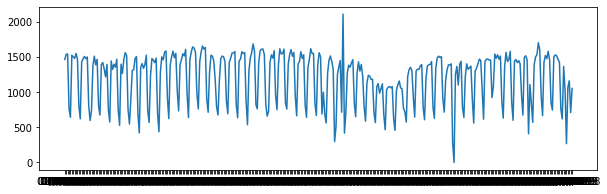

In [43]:
mask = ((turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") & 
(turnstiles_daily["SCP"] == "02-00-00") & 
(turnstiles_daily["STATION"] == "59 ST"))

plt.figure(figsize=(10,3))
plt.plot(turnstiles_daily[mask].DATE, turnstiles_daily[mask].DAILY_ENTRIES)


In [44]:
#Need to investigate the blip above further
turnstiles_daily.loc[turnstiles_daily['DAILY_ENTRIES'].idxmax()]
#turnstiles_daily.loc[turnstiles_daily['DAILY_ENTRIES'].idxmax()]

C/A                        A033
UNIT                       R170
SCP                    02-00-04
STATION          14 ST-UNION SQ
DATE                 06/24/2019
ENTRIES                 5704772
PREV_DATE            06/23/2019
PREV_ENTRIES        5.70019e+06
DAILY_ENTRIES              4585
Name: 41200, dtype: object

# Challenge 5
Sum up all the entry values at the Control Area/Unit/Station level

In [45]:
CUS_df = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"]).DAILY_ENTRIES.sum().reset_index()

In [46]:
CUS_df.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,01/02/2019,12864.0
1,A002,R051,59 ST,01/03/2019,13464.0
2,A002,R051,59 ST,01/04/2019,13296.0
3,A002,R051,59 ST,01/05/2019,8130.0
4,A002,R051,59 ST,01/06/2019,6988.0


# Challenge 6
Sum up all the daily entry values at the station level

In [111]:
station_df = turnstiles_daily.groupby(["STATION", "DATE"]).DAILY_ENTRIES.sum().reset_index()

In [112]:
station_df.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2019,18476.0
1,1 AV,01/03/2019,15023.0
2,1 AV,01/04/2019,15625.0
3,1 AV,01/05/2019,13930.0
4,1 AV,01/06/2019,12021.0


# Challenge 7
Plot the daily timeseries for a single station

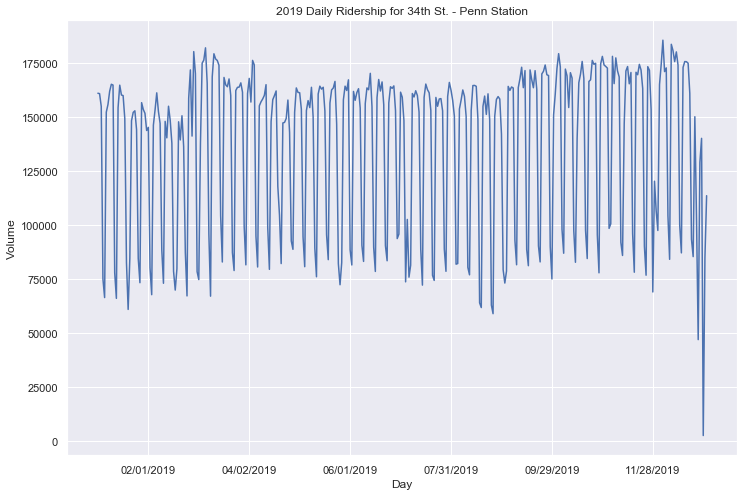

In [149]:
mask = ((station_df["STATION"] == "34 ST-PENN STA"))

plt.figure(num=None, figsize=(12, 8))
plt.plot(station_df[mask].DATE, station_df[mask].DAILY_ENTRIES)
plt.title("2019 Daily Ridership for 34th St. - Penn Station")
plt.xlabel("Day")
plt.ylabel("Volume")
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
plt.xticks([30, 90, 150, 210, 270, 330])
plt.savefig('charts/34_ST-PENN_STA-Daily_Agg_Volume.png')


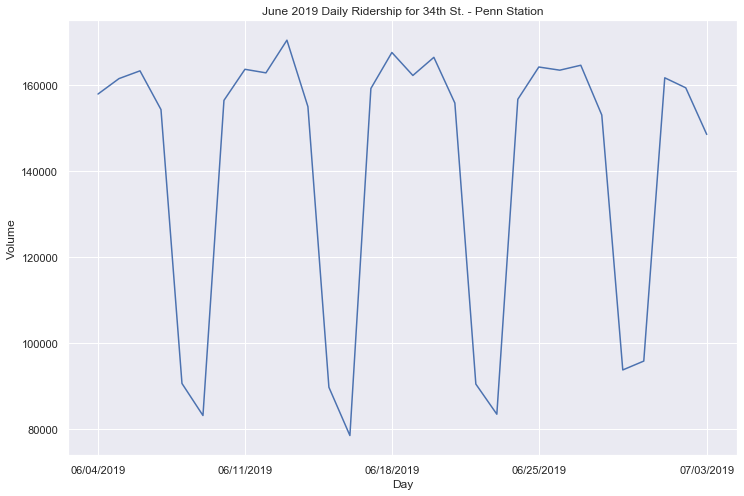

In [155]:
mask = ((station_df["STATION"] == "34 ST-PENN STA") &
        (station_df["DATE"] > "06/03/2019") &
        (station_df["DATE"] < "07/04/2019"))

plt.figure(num=None, figsize=(12, 8))
plt.plot(station_df[mask].DATE, station_df[mask].DAILY_ENTRIES)
plt.title("June 2019 Daily Ridership for 34th St. - Penn Station")
plt.xlabel("Day")
plt.ylabel("Volume")
plt.xticks([0, 7, 14, 21, 29])
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
#plt.xticks(np.arange(min(station_df[mask].DAILY_ENTRIES), max(station_df[mask].DAILY_ENTRIES), 4.0))
plt.savefig('charts/34_ST-PENN_STA-June_Agg_Volume.png')

# Challenge 8
Create a list of counts for one week for one station

In [50]:
#need to convert the DATE object into a DateTime
station_df["DATE_TIME"] = pd.to_datetime(station_df.DATE + " " + "00:00:00", format="%m/%d/%Y %H:%M:%S")

In [51]:
#day_num = pd.date_range(station_df[mask].DATE_TIME.min(), station_df[mask].DATE_TIME.max(), freq='D').to_series() 
#print(day_num.dt.dayofweek)

In [52]:

  
week_list=[]
cur_list=[]
for index, row in station_df[mask].iterrows():
    if row['DATE_TIME'].dayofweek != 6:
        cur_list.append(row['DAILY_ENTRIES'])
    elif row['DATE_TIME'].dayofweek == 6:
        cur_list.append(row['DAILY_ENTRIES'])
        week_list.append(cur_list)
        cur_list=[]

In [53]:
counter=0
for i in week_list:
    print("Week ", counter, ": ", i, "\n")
    counter = counter+1
    

Week  0 :  [10034.0, 10524.0, 10715.0, 5611.0, 4761.0] 

Week  1 :  [10300.0, 10697.0, 10977.0, 10868.0, 10950.0, 6115.0, 4779.0] 

Week  2 :  [10439.0, 11004.0, 11007.0, 10905.0, 10760.0, 6060.0, 4365.0] 

Week  3 :  [4995.0, 9850.0, 10757.0, 9911.0, 11138.0, 6175.0, 5108.0] 

Week  4 :  [10498.0, 10960.0, 10539.0, 9141.0, 10362.0, 5083.0, 3681.0] 

Week  5 :  [10821.0, 10314.0, 11417.0, 11355.0, 11260.0, 6378.0, 5175.0] 

Week  6 :  [10950.0, 9993.0, 11201.0, 11430.0, 11286.0, 6620.0, 5228.0] 

Week  7 :  [6510.0, 9638.0, 9364.0, 9727.0, 9895.0, 6454.0, 4999.0] 

Week  8 :  [11430.0, 11100.0, 11359.0, 11247.0, 11436.0, 6033.0, 5560.0] 

Week  9 :  [7916.0, 11478.0, 11212.0, 11162.0, 11412.0, 4787.0, 4597.0] 

Week  10 :  [10913.0, 11560.0, 11357.0, 11456.0, 11252.0, 6904.0, 5546.0] 

Week  11 :  [11048.0, 11290.0, 11351.0, 10976.0, 10964.0, 6488.0, 5325.0] 

Week  12 :  [11015.0, 11421.0, 11422.0, 11342.0, 11077.0, 7011.0, 5204.0] 

Week  13 :  [11083.0, 11445.0, 11307.0, 11312.0, 10

# Challenge 9
Create a weekly sum total ridership for each station and sort them so we can find stations with the highest traffic

In [54]:
#list that will aggregate the weekly counts
weekly_data = []

#list for individual values of the week
week_list=[]

#list for individual days
cur_list=[]

for index, row in station_df.iterrows():
    if row['DATE_TIME'].dayofweek != 6:
        cur_list.append(row['DAILY_ENTRIES'])
    elif row['DATE_TIME'].dayofweek == 6:
        cur_list.append(row['DAILY_ENTRIES'])
        week_list.append(cur_list)
        weekly_total=0
        for i in cur_list:
                weekly_total= i+weekly_total
        weekly_data.append([row['STATION'], row['DATE_TIME'], weekly_total])
        cur_list=[]
        
weekly_df = pd.DataFrame(weekly_data, columns = ['STATION', 'WEEK', 'WEEKLY_ENTRIES']) 

In [55]:
#sort by WEEKLY_ENTRIES
weekly_df.sort_values(["WEEKLY_ENTRIES"], inplace=True, ascending=False)
print(weekly_df)

              STATION       WEEK  WEEKLY_ENTRIES
3221   34 ST-PENN STA 2019-12-15       1082005.0
3215   34 ST-PENN STA 2019-11-03       1072609.0
3182   34 ST-PENN STA 2019-03-17       1062822.0
3220   34 ST-PENN STA 2019-12-08       1057988.0
3222   34 ST-PENN STA 2019-12-22       1039605.0
...               ...        ...             ...
16042   ORCHARD BEACH 2019-09-22             0.0
16041   ORCHARD BEACH 2019-09-15             0.0
16040   ORCHARD BEACH 2019-09-08             0.0
15564    NEWARK HM HE 2019-02-24             0.0
15566    NEWARK HM HE 2019-03-10             0.0

[19630 rows x 3 columns]


# Challenge 10
Make a single list of total ridership values for all station and plot it

In [56]:
total_ridership_counts = (weekly_df
 .groupby(["STATION"])
 .WEEKLY_ENTRIES.sum()
 .reset_index()).head(20)

(array([6., 6., 2., 1., 2., 0., 0., 1., 0., 2.]),
 array([  690699. ,  3073336.4,  5455973.8,  7838611.2, 10221248.6,
        12603886. , 14986523.4, 17369160.8, 19751798.2, 22134435.6,
        24517073. ]),
 <a list of 10 Patch objects>)

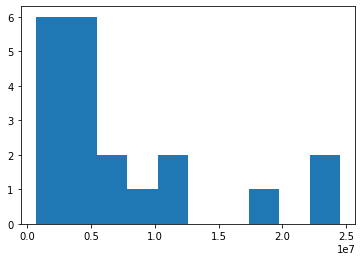

In [57]:
plt.hist(total_ridership_counts.WEEKLY_ENTRIES)

In [58]:
#show the top 20 station by volume
total_ridership_counts = (weekly_df
 .groupby(["STATION"])
 .WEEKLY_ENTRIES.sum()
 .reset_index()
 .sort_values("WEEKLY_ENTRIES", ascending=False)).head(20)

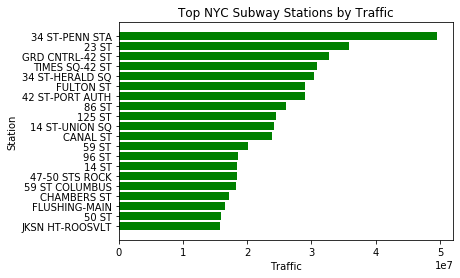

In [68]:
#indices = range(len(total_ridership_counts.WEEKLY_ENTRIES))
#plt.bar(total_ridership_counts.STATION, total_ridership_counts.WEEKLY_ENTRIES)

y = pd.Series(total_ridership_counts['STATION'])
x = pd.Series(total_ridership_counts['WEEKLY_ENTRIES'])

#plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y, x, align='center',
        color='green', ecolor='black')
ax.set_yticks(y)
ax.set_yticklabels(y)
ax.invert_yaxis()  
ax.set_xlabel('Traffic')
ax.set_ylabel('Station')
ax.set_title('Top NYC Subway Stations by Traffic')
plt.savefig('charts/TopTwentyStations-2019-Agg-green.png')
plt.show()


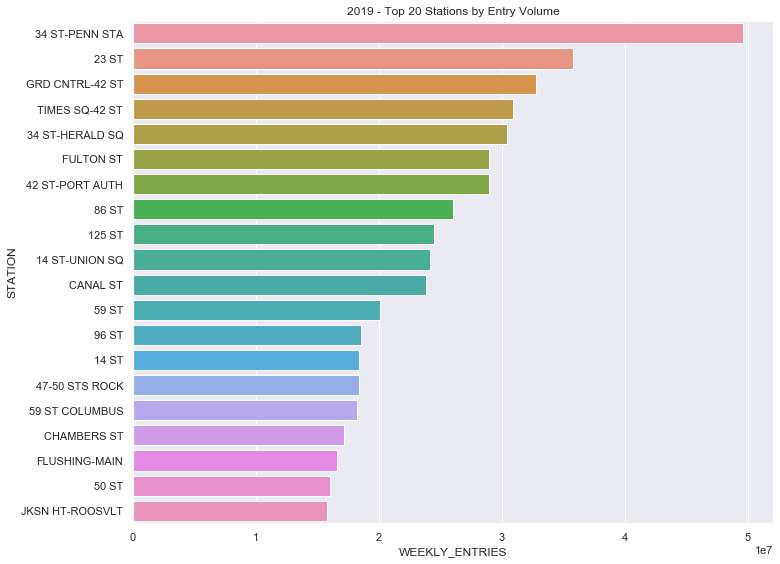

In [106]:
import seaborn as sns

total_ridership = total_ridership_counts.iloc[:20,:] # limit to 20 most active stations
sns.barplot(x="WEEKLY_ENTRIES", y='STATION', data=total_ridership)
sns.set(rc={'figure.figsize':(4,8)})
#plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
#plt.xlabel('Entry Volume', fontsize=12)
#plt.ylabel('Station', fontsize=12)
plt.title('2019 - Top 20 Stations by Entry Volume')
plt.tight_layout()
plt.savefig('charts/TopTwentyStations-2019-Agg.png')
plt.show()
